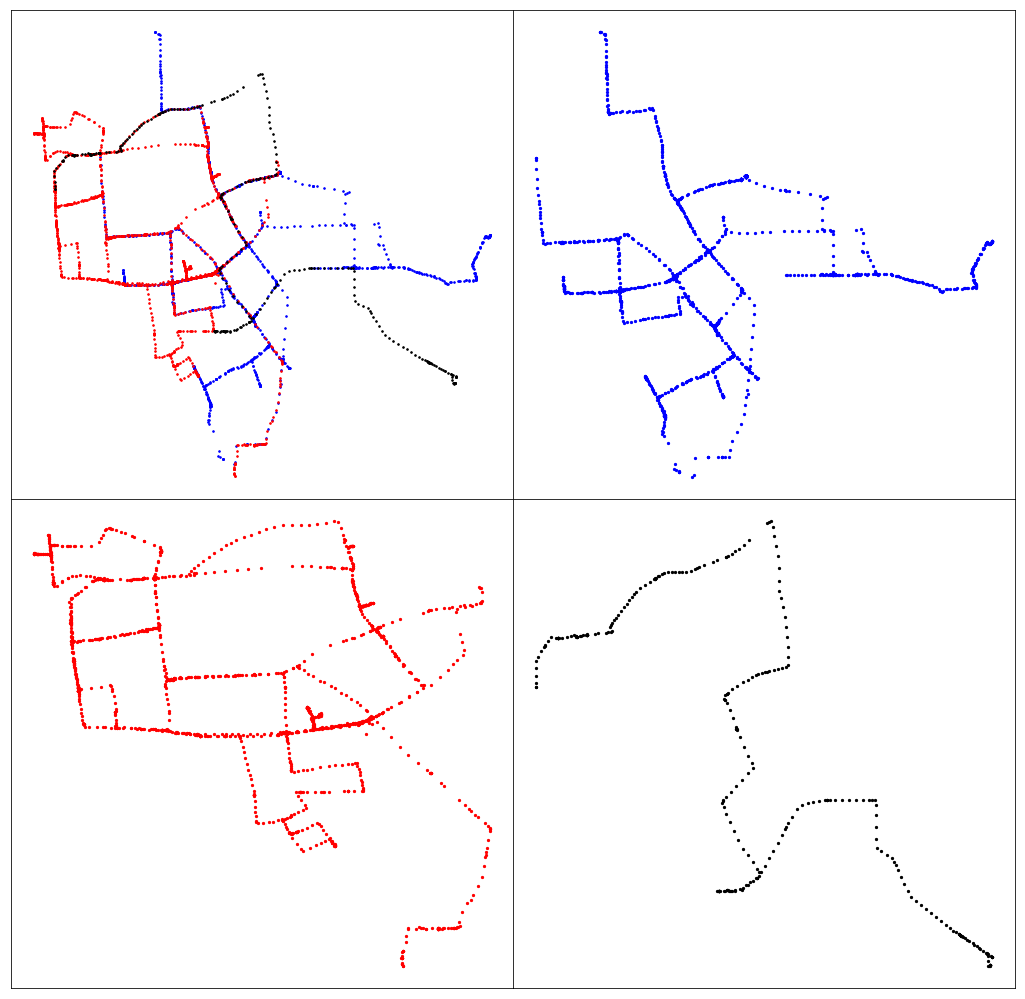

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os,xlrd

def readata(path,sheet,col,chop,str=0):   #参数为 路径 表格 数列 单位字符数 原格式输入
    i=0
    dt=[]
    data=xlrd.open_workbook(path)
    table=data.sheet_by_index(sheet)
    value=table.col_values(col)
    for val in value:
        i+=1
        if i>1:
            if str == 1:
                dt.append(val)
            elif chop==0:
                dt.append(float(val.encode('utf-8')))
            else:
                dt.append(float(val[:-chop].encode('utf-8')))
    return dt

def badpop(lt):              #输入list输出坏值所在index
    i=0
    p=[]
    pop=[]
    mean=np.mean(lt)
    std=np.std(lt)
    for x in lt:
        if abs(mean-x)>std*10:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop

def zeropop(lt):              #去零值
    i=0
    p=[]
    pop=[]
    for x in lt:
        if x==0:
            p.append(i)
        i+=1
    for i in range(len(p)):
        pop.append(p[i]-i)
    return pop

path=u'data/vehicle-京B7Y242-20150416133936.xls'
E=readata(path,2,3,0)
N=readata(path,2,4,0)
time=readata(path,2,7,0,1)

m='none'         #分时段
n='none'
for i in range(len(time)):
    if m=='none' and int(time[i][:2])==12:
        m=i
    if n=='none' and int(time[i][:2])==18:
        n=i
        break

bad=zeropop(E)
for j in range(len(bad)):
    E.pop(bad[j]) 
    N.pop(bad[j]) 

fig=plt.figure(111)
fig.set_size_inches(18,18)
ax=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)
ax.set_xticks([])
ax.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
plt.subplots_adjust(wspace=0,hspace=0)

ax.scatter(E[:m],N[:m],marker='.',s=10,color='b',alpha=1)
ax.scatter(E[m+1:n],N[m+1:n],marker='.',s=10,color='r',alpha=1)
ax.scatter(E[n+1:],N[n+1:],marker='.',s=10,color='k',alpha=1)
ax1.scatter(E[:m],N[:m],marker='.',s=20,color='b',alpha=1)
ax2.scatter(E[m+1:n],N[m+1:n],marker='.',s=20,color='r',alpha=1)
ax3.scatter(E[n+1:],N[n+1:],marker='.',s=20,color='k',alpha=1)